In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, make_scorer

In [2]:
df = pd.read_csv("./heart.csv")
pd.set_option('display.max_rows', None)

In [3]:
print(df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
5     57    1   0     140   192    0        1       148     0      0.4    1   
6     56    0   1     140   294    0        0       153     0      1.3    1   
7     44    1   1     120   263    0        1       173     0      0.0    2   
8     52    1   2     172   199    1        1       162     0      0.5    2   
9     57    1   2     150   168    0        1       174     0      1.6    2   
10    54    1   0     140   239    0        1       160     0      1.2    2   
11    48    0   2     130   275    0        1       

In [4]:
# verificando o tipo dos dados

df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [5]:
# verificando se existem valores nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# verificando se existem valores nulos


df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

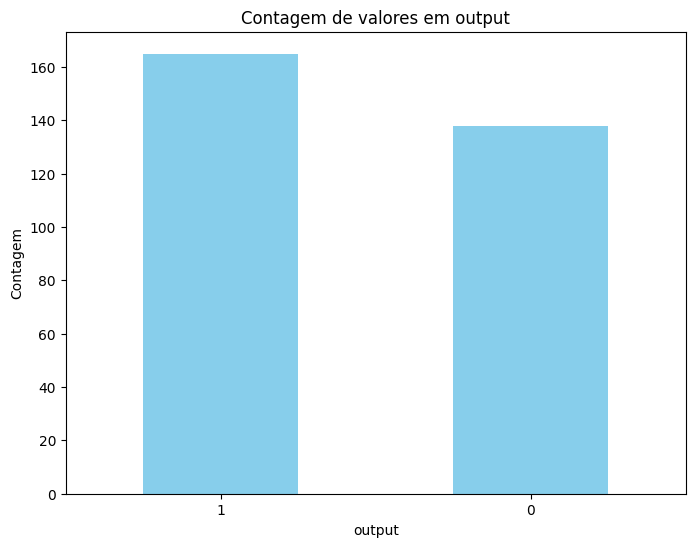

In [7]:
# analisando os dados das features

plt.figure(figsize=(8, 6))

column = "output"

df[column].value_counts().plot(kind='bar', color='skyblue')
plt.title(f'Contagem de valores em {column}')
plt.xlabel(column)
plt.ylabel('Contagem')
plt.xticks(rotation=0)

plt.show()

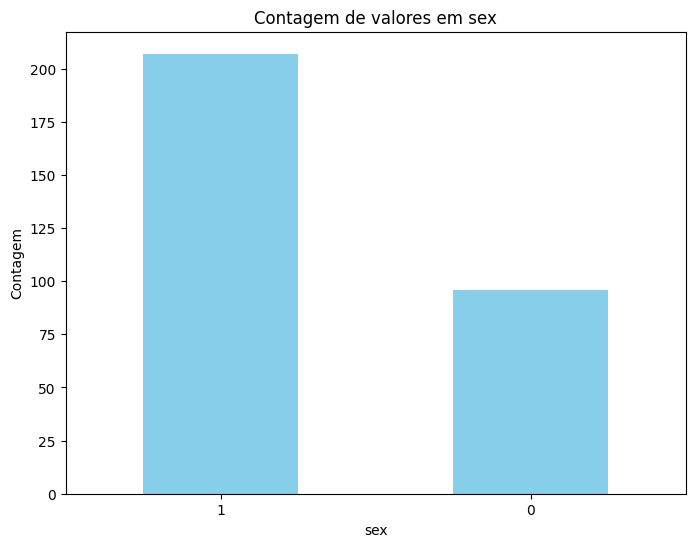

In [8]:
plt.figure(figsize=(8, 6))

column = "sex"

df[column].value_counts().plot(kind='bar', color='skyblue')
plt.title(f'Contagem de valores em {column}')
plt.xlabel(column)
plt.ylabel('Contagem')
plt.xticks(rotation=0)

plt.show()

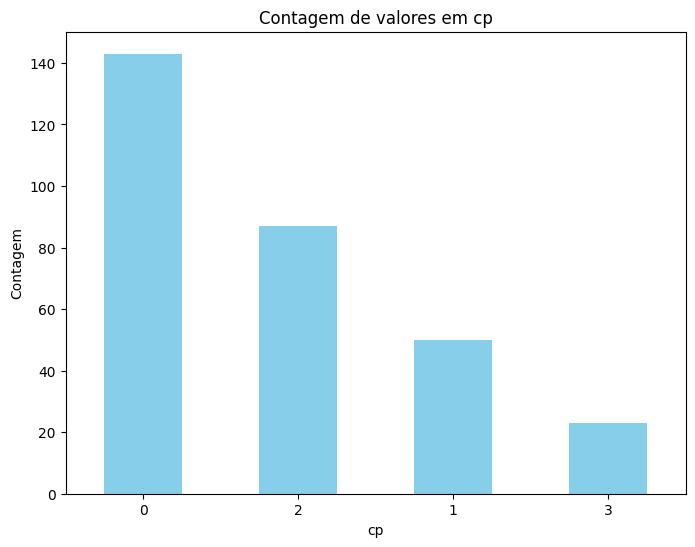

In [9]:
plt.figure(figsize=(8, 6))

column = "cp"

df[column].value_counts().plot(kind='bar', color='skyblue')
plt.title(f'Contagem de valores em {column}')
plt.xlabel(column)
plt.ylabel('Contagem')
plt.xticks(rotation=0)

plt.show()

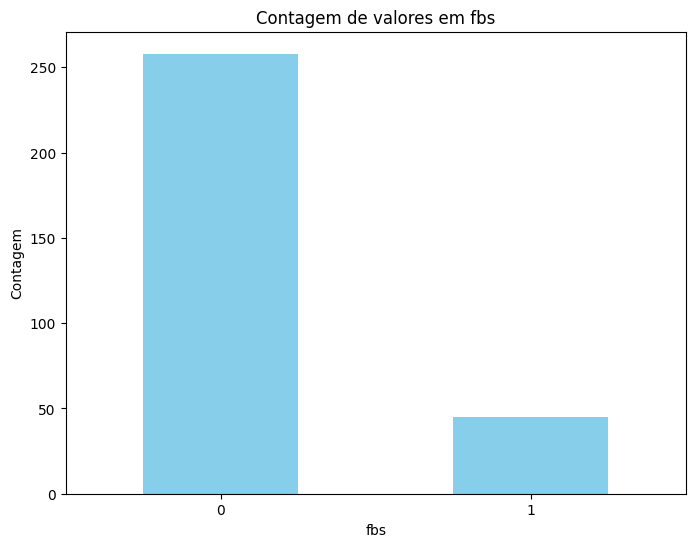

In [10]:
plt.figure(figsize=(8, 6))

column = "fbs"

df[column].value_counts().plot(kind='bar', color='skyblue')
plt.title(f'Contagem de valores em {column}')
plt.xlabel(column)
plt.ylabel('Contagem')
plt.xticks(rotation=0)

plt.show()

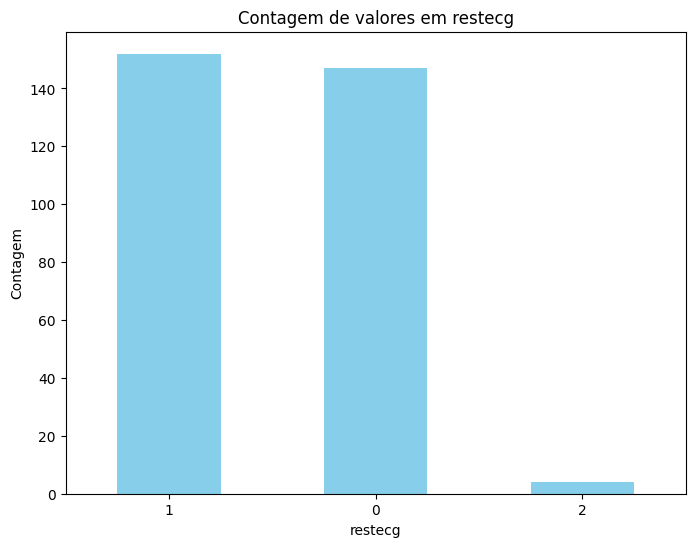

In [11]:
plt.figure(figsize=(8, 6))

column = "restecg"

df[column].value_counts().plot(kind='bar', color='skyblue')
plt.title(f'Contagem de valores em {column}')
plt.xlabel(column)
plt.ylabel('Contagem')
plt.xticks(rotation=0)

plt.show()

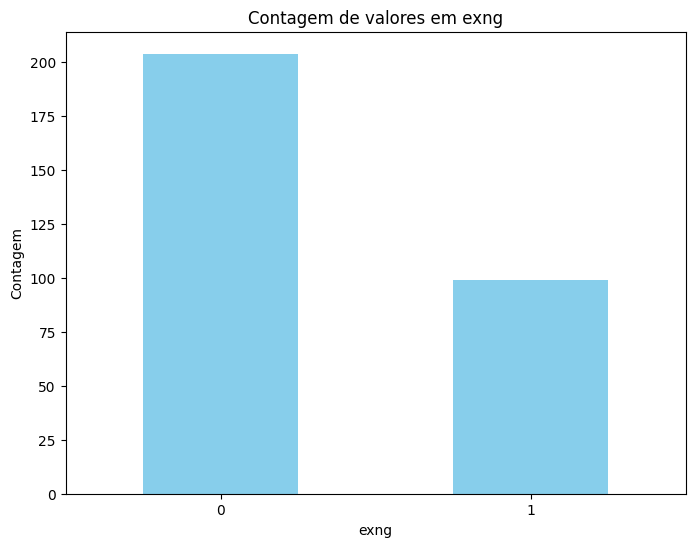

In [12]:
plt.figure(figsize=(8, 6))

column = "exng"

df[column].value_counts().plot(kind='bar', color='skyblue')
plt.title(f'Contagem de valores em {column}')
plt.xlabel(column)
plt.ylabel('Contagem')
plt.xticks(rotation=0)

plt.show()

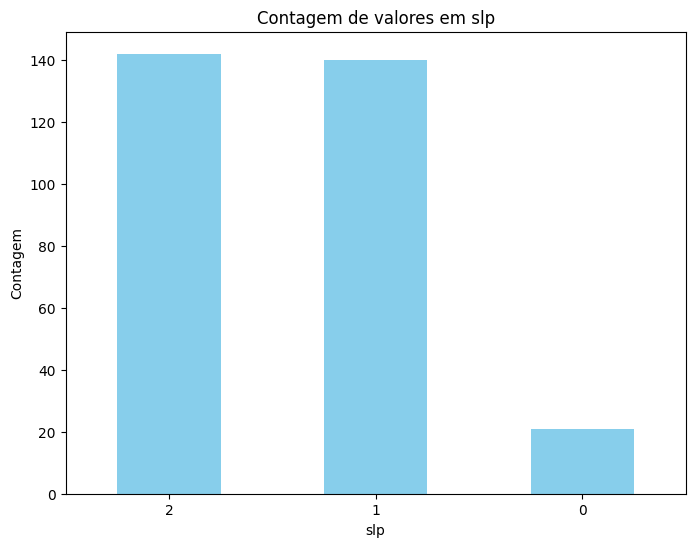

In [13]:
plt.figure(figsize=(8, 6))

column = "slp"

df[column].value_counts().plot(kind='bar', color='skyblue')
plt.title(f'Contagem de valores em {column}')
plt.xlabel(column)
plt.ylabel('Contagem')
plt.xticks(rotation=0)

plt.show()

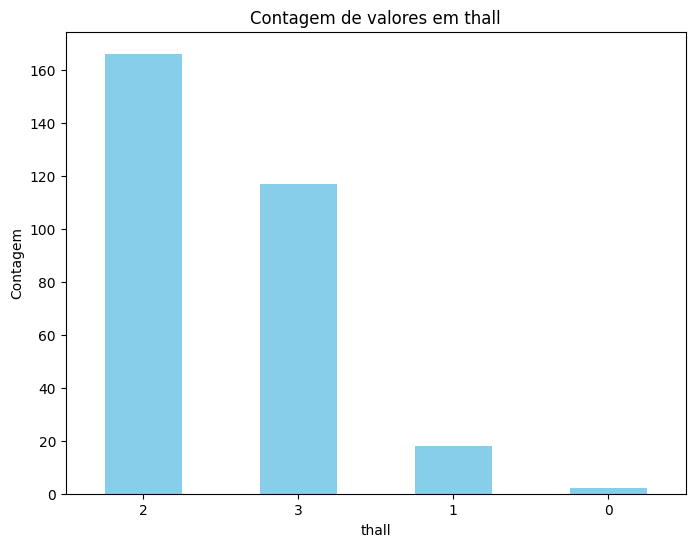

In [14]:
plt.figure(figsize=(8, 6))

column = "thall"

df[column].value_counts().plot(kind='bar', color='skyblue')
plt.title(f'Contagem de valores em {column}')
plt.xlabel(column)
plt.ylabel('Contagem')
plt.xticks(rotation=0)

plt.show()

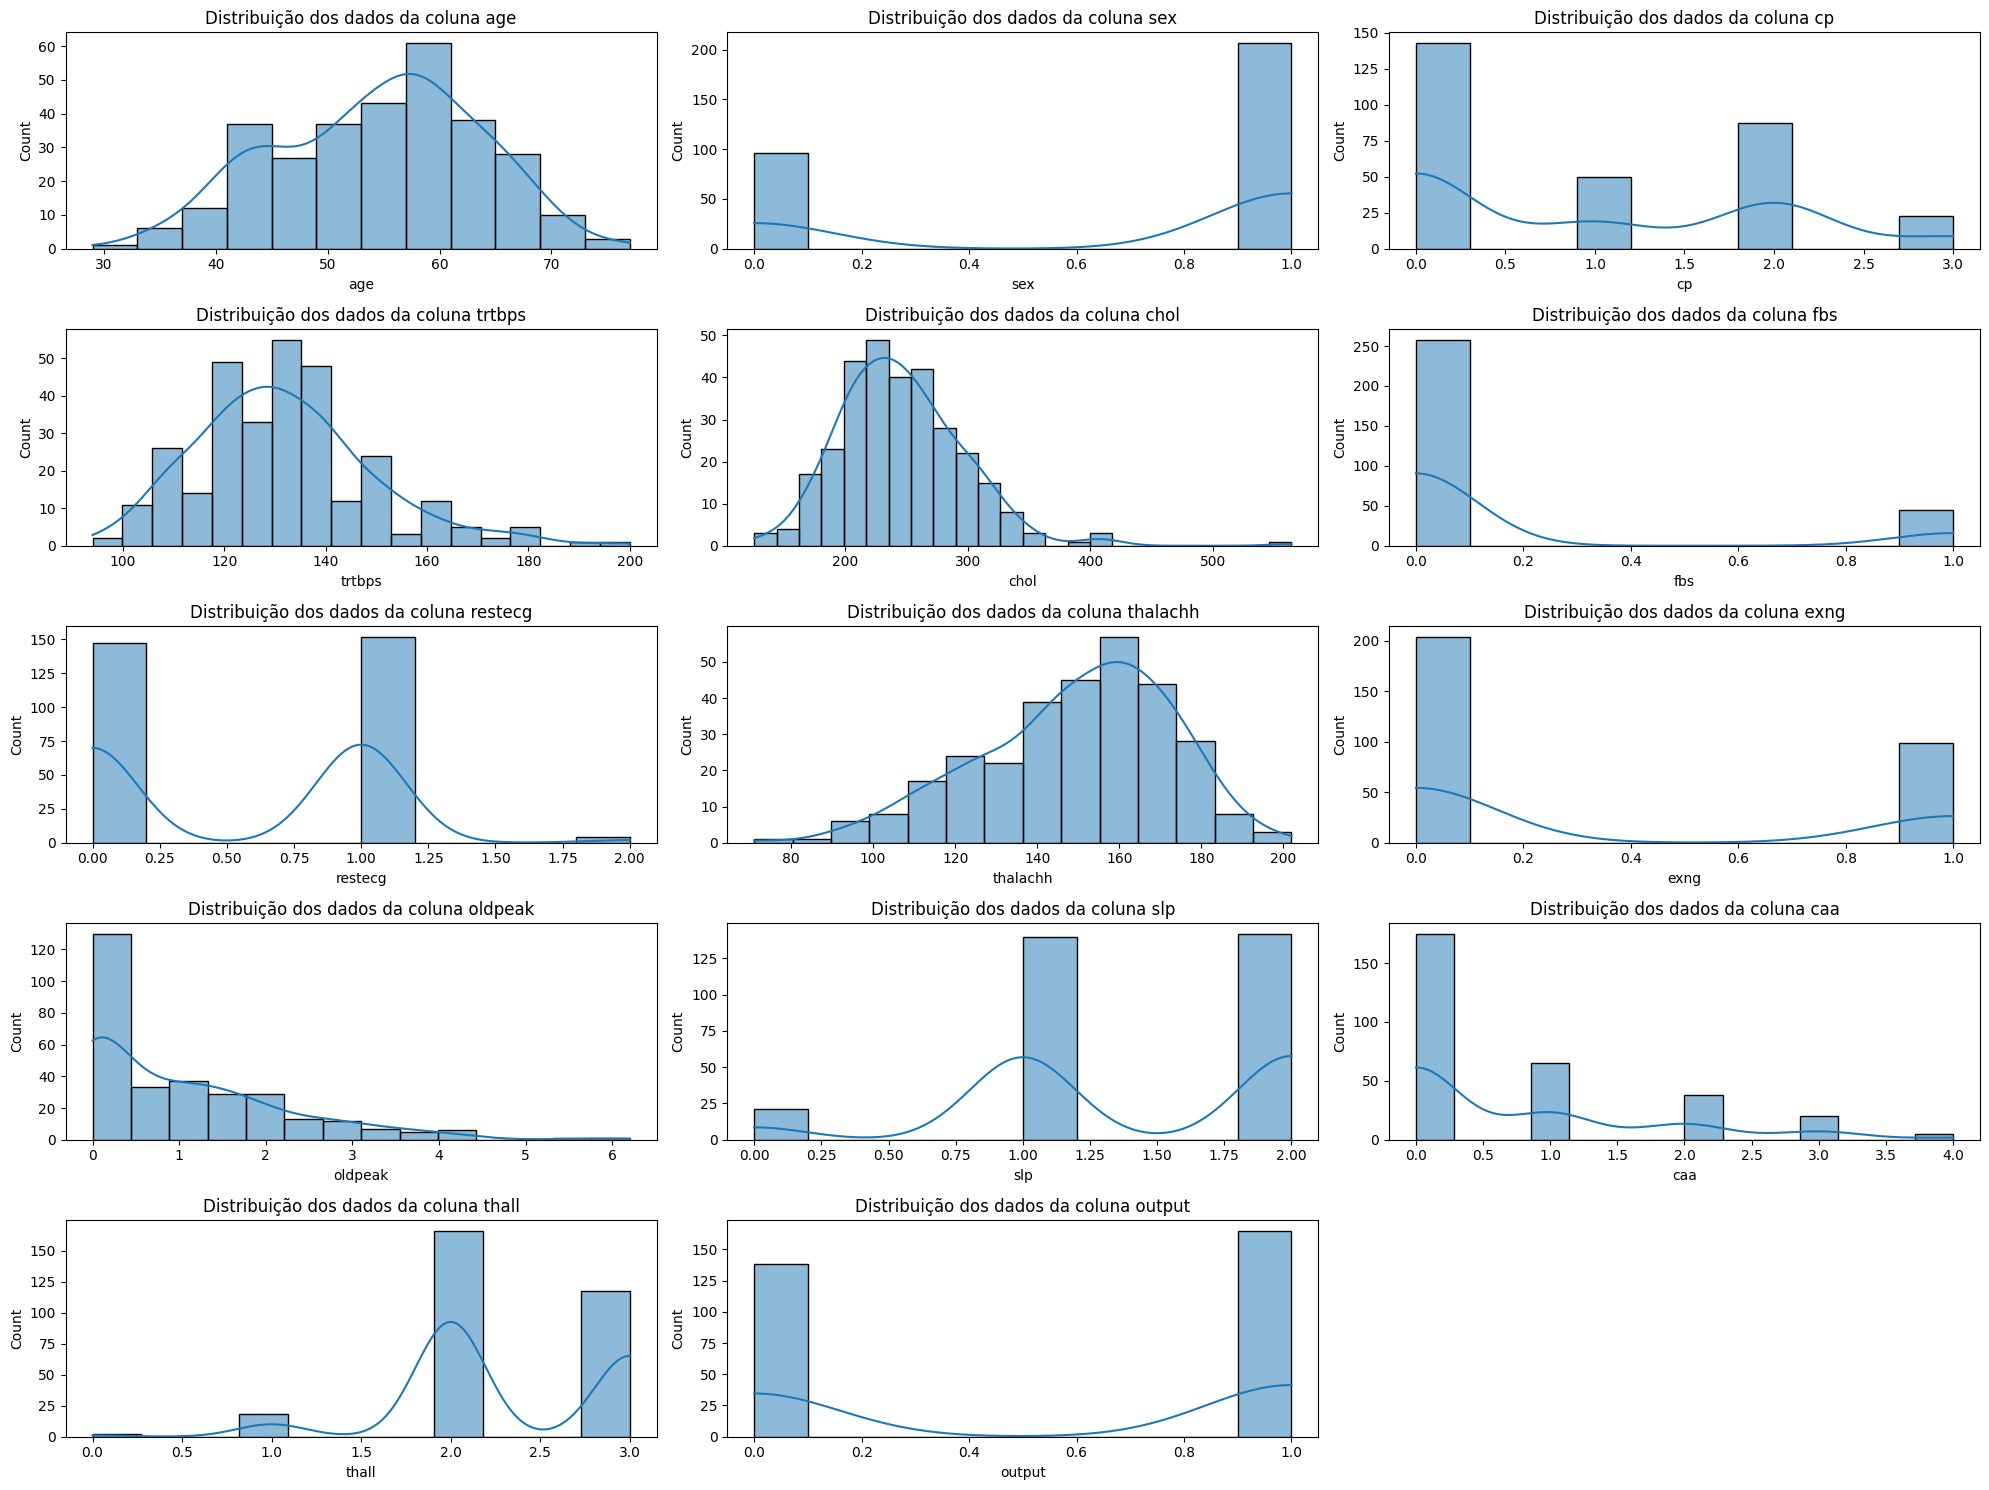

In [15]:
# Visao geral
# Observa-se a necessidade de normalizar os dados, devido que muitas features nao estao na distribuicao normal

plt.figure(figsize=(20, 15))

for grafico, feature in enumerate(df.columns, 1):
    plt.subplot(5, 3, grafico)
    plt.title(f"Distribuição dos dados da coluna {feature}")
    sns.histplot(df[feature], kde=True)
    plt.tight_layout()
    plt.plot()

In [16]:
# normalizacao usando RubostScaler para corrigir os outliers

categorias = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
valores_numericos = ['age','trtbps','chol','thalachh','oldpeak']

df = pd.get_dummies(df, columns = categorias, drop_first = True)

X = df.drop(['output'], axis = 1)
y = df[['output']]

y = y.values.reshape(-1)

rs = RobustScaler()

X[valores_numericos] = rs.fit_transform(X[valores_numericos])

X

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
1,-1.333333,0.00,0.157480,1.046154,1.6875,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,-1.037037,0.00,-0.566929,0.584615,0.3750,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0.074074,-0.50,-0.062992,0.769231,0.0000,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,0.148148,-0.50,1.795276,0.307692,-0.1250,False,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
5,0.148148,0.50,-0.755906,-0.153846,-0.2500,True,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
6,0.074074,0.50,0.850394,0.000000,0.3125,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
7,-0.814815,-0.50,0.362205,0.615385,-0.5000,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
8,-0.222222,2.10,-0.645669,0.276923,-0.1875,True,False,False,False,False,...,True,False,True,True,False,False,True,False,False,True
9,0.148148,1.00,-1.133858,0.646154,0.5000,True,False,False,False,False,...,True,False,False,True,False,False,True,False,True,False


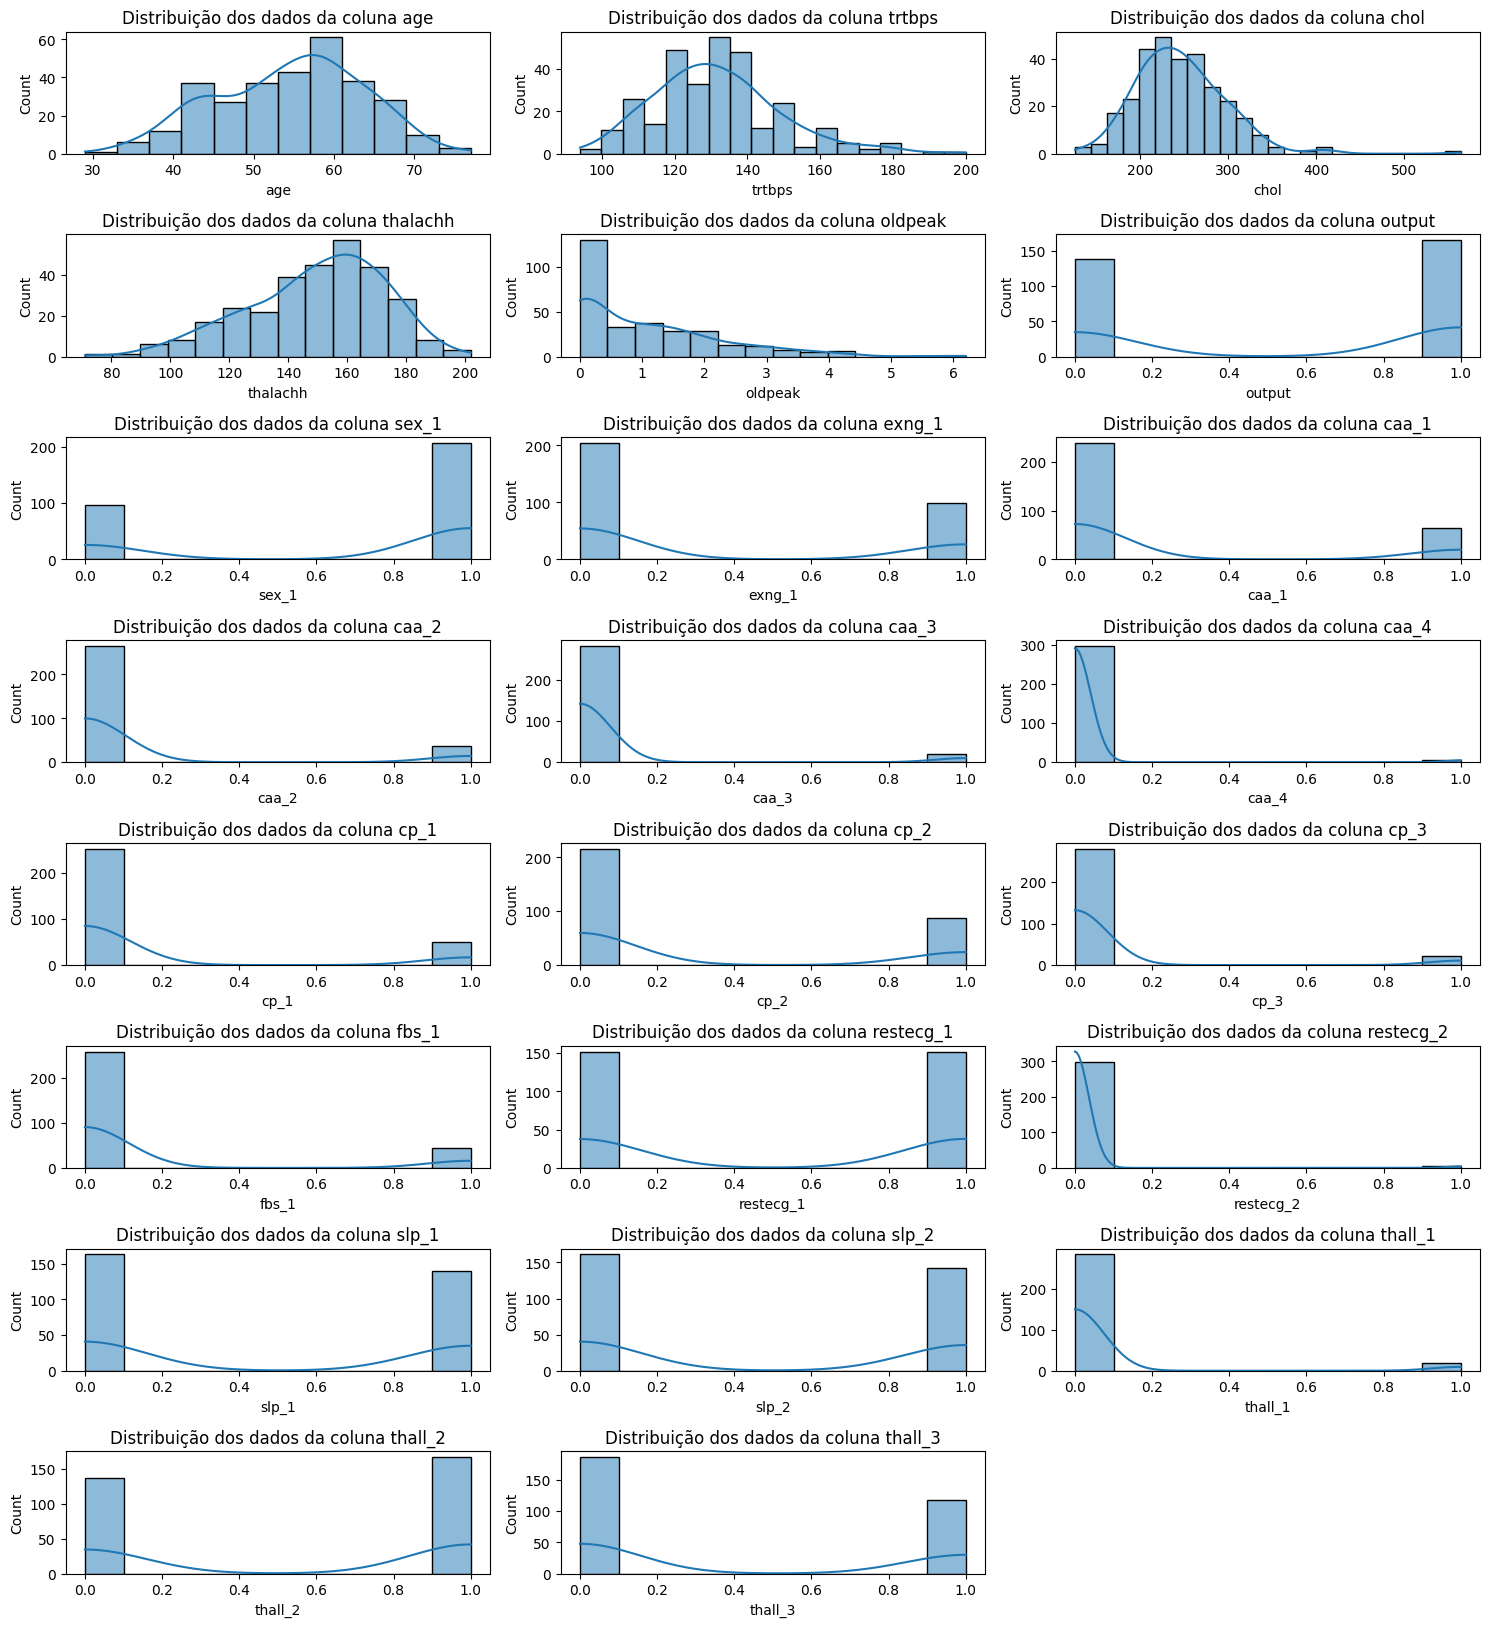

In [17]:
# Resultado

plt.figure(figsize=(15, 20))

for grafico, feature in enumerate(df.columns, 1):
    plt.subplot(10, 3, grafico)
    plt.title(f"Distribuição dos dados da coluna {feature}")
    sns.histplot(df[feature], kde=True)
    plt.tight_layout()
    plt.plot()

In [53]:
# Separacao entre os dados de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Seleção de Modelos

O grupo pesquisou diversos algoritmos usados quando se precisa realizar uma classificação binaria. 

Após selecionado quais os algoritmos mais adequados foram levantados quais as vantagens de desvantagens de cada um. 

O resultado da pesquisa se encontra a seguir:

# Vantagens e Desvantagens de Algoritmos para Classificação Binária

## Regressão Logística
- **Vantagens**:
  - Interpretabilidade: Fácil de interpretar e explicar.
  - Rápido para treinar e prever.
  - Fornece probabilidades de classe.
- **Desvantagens**:
  - Assume linearidade entre variáveis independentes e dependentes.
  - Pode não funcionar bem com features não lineares.

## Gradient Boosting
- **Vantagens**:
  - Alta precisão.
  - Lida bem com features heterogêneas.
  - Pode capturar relações complexas entre features.
- **Desvantagens**:
  - Propenso a overfitting se não ajustado corretamente.
  - Tempo de treinamento mais longo.

## KNeighbors Classifier
- **Vantagens**:
  - Simples de entender e implementar.
  - Não requer suposições sobre a distribuição dos dados.
- **Desvantagens**:
  - Sensível à escala dos dados e ao número de vizinhos.
  - Pode ser computacionalmente caro para grandes conjuntos de dados.

## Decision Tree Classifier
- **Vantagens**:
  - Fácil interpretação e visualização.
  - Pode capturar relações não lineares entre features.
- **Desvantagens**:
  - Propenso a overfitting, especialmente em árvores profundas.
  - Instável, pequenas variações nos dados podem resultar em árvores muito diferentes.

## Random Forest
- **Vantagens**:
  - Reduz overfitting em comparação com árvores de decisão individuais.
  - Lida bem com dados de alta dimensionalidade e variáveis categóricas.
- **Desvantagens**:
  - Menos interpretação direta em comparação com uma única árvore de decisão.
  - Pode ser lento para prever, especialmente em conjuntos de dados grandes.

## Naive Bayes Classifier
- **Vantagens**:
  - Rápido para treinar e prever.
  - Funciona bem com conjuntos de dados de alta dimensionalidade.
- **Desvantagens**:
  - Assume independência condicional entre as features, o que pode não ser realista em muitos casos.
  - Sensível à distribuição dos dados e à presença de features irrelevantes.


In [54]:
# Lista de modelos escolhidos mediante pesquisa sobre os melhores modelos para classificação binária
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Naive Bayes Classifier', GaussianNB())
]

# Variáveis usadas para determinar o melhor modelo baseado no F1-Score
best_f1_model = None
f1 = 0.0
best_f1_score = 0.0

# Variáveis usadas para determinar o melhor modelo baseado na acuracia
best_accuracy_model = None
accuracy = 0.0
best_accuracy = 0.0

# Laço para verificar o desempenho de cada modelo 
for name, model in models:
    
    # Treina os modelo com os dados de treinamento
    model.fit(X_train, y_train)
    
    # Realizada o teste com os dados de teste
    y_pred = model.predict(X_test)
    
    # Calcula a acuracia
    accuracy = accuracy_score(y_test, y_pred)

    # Calcula o F1-Score
    f1 = f1_score(y_test, y_pred)
    
    # Mostra o nome dos modelos e as metricas obtidas
    print("Model:    ", name)
    print("Accuracy: ", accuracy)
    print("F1-Score: ", f1, "\n")
    
    # Verifica qual o modelo possui o melhor f1-score
    if f1 > best_f1_score:
        best_f1_score = f1
        best_f1_model = name

    # Verifica qual o modelo possui a melhor acuracia
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_accuracy_model = name
    
# Mostra qual foi o modelo com o melhor f1-score
print("Best Model by F1-Score: ", best_f1_model)

# Mostra qual foi o modelo com o melhor acuracia
print("Best Model by Accuracy: ", best_accuracy_model)

Model:     Logistic Regression
Accuracy:  0.8681318681318682
F1-Score:  0.88 

Model:     Gradient Boosting
Accuracy:  0.7692307692307693
F1-Score:  0.7741935483870968 

Model:     KNeighbors Classifier
Accuracy:  0.8241758241758241
F1-Score:  0.84 

Model:     Decision Tree Classifier
Accuracy:  0.7582417582417582
F1-Score:  0.7659574468085106 

Model:     Random Forest
Accuracy:  0.8021978021978022
F1-Score:  0.8163265306122449 

Model:     Naive Bayes Classifier
Accuracy:  0.8021978021978022
F1-Score:  0.8125 

Best Model by F1-Score:  Logistic Regression
Best Model by Accuracy:  Logistic Regression


## Escolha do modelo

Verificou-se que os algoritmos regressão logística e KNeighbors e obteveram os melhores resultados de acurácia e F1-Score. Destacando o algoritmo de regressão logística que se mostrou muito promissor.

## Tuning de hyperparametros

Para cada modelo, foram levantados os hiperparâmetros mais promissores visando aumentar o desempenho dos mesmos

Em seguida, foi aplicado o método de validação cruzada, dividindo o conjunto de dados em cinco partes para evitar o overfitting


In [55]:
new_models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Naive Bayes Classifier', GaussianNB())
]

# Definindo a função que ira realizar o tuning de hyperparametros
def hyperparameter_tuning(X_train, X_test, y_train, y_test, models):
    # Dicionáriopara guardar os resultados
    results = {}

    # Loop através de cada modelo
    for model_name, model in models:
        # Defina a grade de parâmetros com base no modelo
        param_grid = {}
        if model_name == 'Logistic Regression':
            param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
        elif model_name == 'KNeighbors Classifier':
            param_grid = {'n_neighbors': [3, 5, 7, 9]}
        elif model_name == 'Naive Bayes Classifier':
            param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
        elif model_name == 'Decision Tree Classifier':
            param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
        elif model_name == 'Random Forest':
            param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
        elif model_name == 'Gradient Boosting':
            param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}

        scoring = {'Accuracy': make_scorer(accuracy_score), 'F1': make_scorer(f1_score, average='macro')}
        
        # Realiza busca em grade com cross-validation
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='F1')
        grid_search.fit(X_train, y_train)
        
        # Obtenha os melhores parâmetros e o melhor modelo
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        test_accuracy = best_model.score(X_test, y_test)
        y_pred = best_model.predict(X_test)
        test_f1 = f1_score(y_test, y_pred, average='macro')
        
        # Armazena os resultados para este modelo
        results[model_name] = {
            'best_params': best_params,
            'validation_accuracy': grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_],
            'validation_f1': grid_search.cv_results_['mean_test_F1'][grid_search.best_index_],
            'test_accuracy': test_accuracy,
            'test_f1': test_f1,
        }
    
    return results
    
# Chama a função para realizar ajuste de hiperparâmetros
results = hyperparameter_tuning(X_train, X_test, y_train, y_test, new_models)


In [57]:
# Imprime os resultados
for model_name, info in results.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {info['best_params']}")
    print(f"Validation Accuracy: {info['validation_accuracy']:.4f}")
    print(f"Validation F1: {info['validation_f1']:.4f}")
    print(f"Test Accuracy: {info['test_accuracy']:.4f}")
    print(f"Test F1: {info['test_f1']:.4f}")
    print("-" * 40)

Model: Logistic Regression
Best Parameters: {'C': 10}
Validation Accuracy: 0.8204
Validation F1: 0.8171
Test Accuracy: 0.8462
Test F1: 0.8446
----------------------------------------
Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Validation Accuracy: 0.8158
Validation F1: 0.8138
Test Accuracy: 0.7912
Test F1: 0.7896
----------------------------------------
Model: KNeighbors Classifier
Best Parameters: {'n_neighbors': 5}
Validation Accuracy: 0.8207
Validation F1: 0.8157
Test Accuracy: 0.8242
Test F1: 0.8224
----------------------------------------
Model: Decision Tree Classifier
Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Validation Accuracy: 0.7502
Validation F1: 0.7472
Test Accuracy: 0.7582
Test F1: 0.7580
----------------------------------------
Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Validation Accuracy: 0.8109
Validation F1: 0.8079
Test Accuracy: 0.

## Resultado

Entre os modelos avaliados, o Logistic Regression apresentou o melhor desempenho geral, com uma acurácia de 0.917 e um score F1 de 0.926, indicando um excelente equilíbrio entre precisão e recall. 

O Random Forest também demonstrou bom desempenho, com acurácia de 0.854 e score F1 de 0.868. Por outro lado, o Decision Tree Classifier teve o desempenho mais baixo, com acurácia de 0.792 e score F1 de 0.808. Esses resultados podem orientar a escolha do modelo mais adequado para aplicação em problemas semelhantes no futuro.